<img src='PCA.png' />

## Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## The Data

Let's work with the cancer data set again since it had so many features.

In [71]:
from sklearn.datasets import load_breast_cancer

In [72]:
cancer = load_breast_cancer()

In [73]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [21]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [22]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [33]:

df=pd.read_csv("can_data.csv",header=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


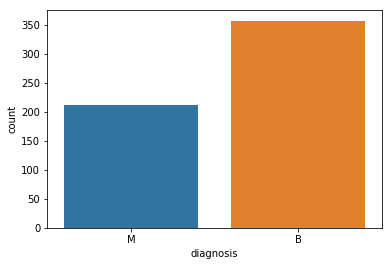

In [12]:
sns.countplot(df['diagnosis'])

### no of cancer patients having malign cancer is less than that of benign sign

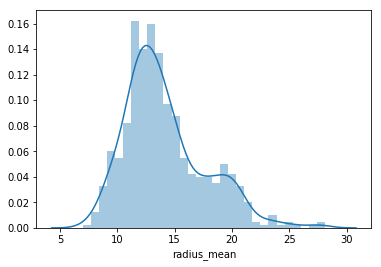

In [16]:
### distribution of cancer tumour radius
sns.distplot(df['radius_mean'],bins=30)

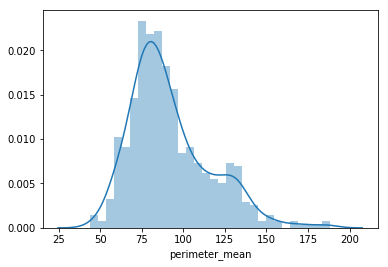

In [18]:
### distribution of cancer tumour perimeter
sns.distplot(df['perimeter_mean'],bins=30)

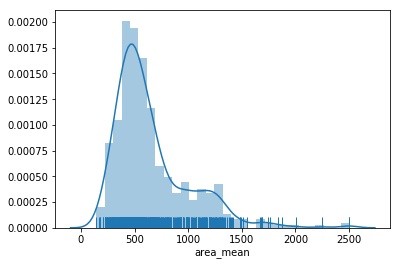

In [21]:
### distribution of cancer tumour area
sns.distplot(df['area_mean'],bins=30,rug=True)

## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [35]:
from sklearn.preprocessing import StandardScaler

In [ ]:
### to understand what methods StandardScaler function support - press tab after .
### also find it in sci-kitlearn.org
## StandardScaler. 

In [36]:
### the fit method of StandardScaler function will fit the dataframe (df in this case) to the rules run by the
### StandardScaler function
### bring all the features in dataframe df into one standard measurement 
#### drop the diagnosis variable as its not numeric and its a target variable. 
scaler = StandardScaler()
scaler.fit(df.drop(['diagnosis','Unnamed: 32'],axis=1))

C:\Users\anand\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
### Transform method will actually apply the rules and create a new scaled data.
scaled_data = scaler.transform(df.drop(['diagnosis','Unnamed: 32'],axis=1))

C:\Users\anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [38]:
scaled_data

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [32]:
## another way of scaling without assigning to a variable
### StandardScaler.transform(df)

In [40]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

1) standardization will be done
2) pca will run correlation and create correlation matrix for all the  columns
3) pca will calculate Eigen values and Eigen vectors which will act as the weightage given to each column
   assigned to a particular principal component
4) Whichever component has the highest average weightage will be termed as first principal component
5) assume pc1 - can explain 90% of the dataset
6) assume pc2 - can explain 10% of the dataset
7) our 31 col dataset has been reduced to 2 col dataset pc1 and pc2 which are capable of 
   explaining 100% of the dataset

In [41]:
from sklearn.decomposition import PCA

In [42]:
### n-components helps to define the total number of principal components
### statistically speaking, for any dataset, the total no principal components - can be maximum of 2
#### the first principal component - will have the highest capability to explain the entire dataset
#### the second principal component - will have the second highest capability to explain the entire dataset
pca = PCA(n_components=2)

In [43]:
### FIT THE PCA on scaled data
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 2 principal components.

In [44]:
### transform the data to create first 2 principal components
x_pca = pca.transform(scaled_data)

In [43]:
### before PCA, we had 569 rows and 30 columns
scaled_data.shape


(569, 30)

In [48]:
### after pca we have 569 rows and 2 columns (1st principal component , 2nd principal component)
x_pca.shape

(569, 2)

In [50]:
x_pca.ndim

2

In [51]:
x_pca.size

1138

In [47]:
print(x_pca)

[[ 9.18319983  1.97127137]
 [ 2.38329766 -3.75345877]
 [ 5.74247239 -1.08035048]
 ...
 [ 1.2518901  -1.89397674]
 [10.36503528  1.69639755]
 [-5.47826365 -0.67278804]]


In [53]:
### convert the numpy array x_pca to a data frame. this helps in viewing data bettre

x_pca_df = pd.DataFrame(x_pca)

In [57]:
### information of x_pca_df
x_pca_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
0    569 non-null float64
1    569 non-null float64
dtypes: float64(2)
memory usage: 9.0 KB


In [58]:
### sample data from x_pca_df
x_pca_df.head(6)


,0,1
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689
5,2.371151,3.964910


In [59]:
### sample data from x_pca_df
x_pca_df.tail(6)

,0,1
563,8.734272,-0.556345
564,6.435329,-3.565358
565,3.789458,-3.573419
566,1.251890,-1.893977
567,10.365035,1.696398
568,-5.478264,-0.672788


Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

In [45]:
#visualization of my principal components via scatter plots

Text(0, 0.5, 'Second Principal Component')

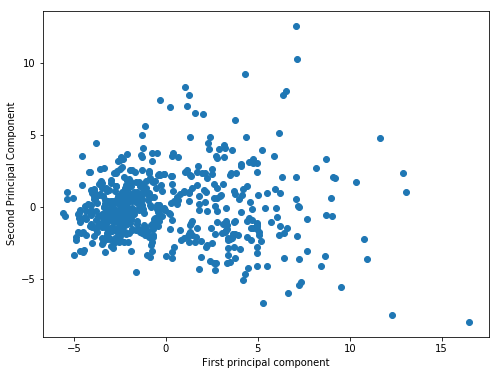

In [60]:
plt.figure(figsize=(8,6))
### all rows and 1st pricipal componnet, all rows and 2nd principal component
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
### making the plot above much more meaningful by spliting based on target variable

Text(0, 0.5, 'Second Principal Component')

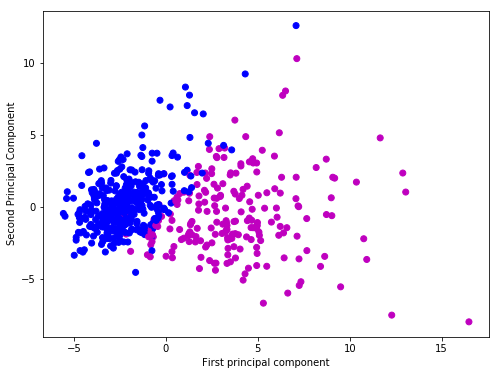

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],color=df['diagnosis'],cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [86]:
pca.components_

array([[ 0.02291216,  0.21891302,  0.10384388,  0.22753491,  0.22104577,
         0.14241471,  0.2390673 ,  0.25828025,  0.26073811,  0.13797774,
         0.06414779,  0.20611747,  0.01741339,  0.21144652,  0.20307642,
         0.01467821,  0.1702884 ,  0.15354367,  0.18340675,  0.04241552,
         0.10249607,  0.22800935,  0.10451545,  0.23663734,  0.22493214,
         0.12782441,  0.20988456,  0.22860218,  0.2507462 ,  0.12267993,
         0.13156024],
       [-0.03406849, -0.2332714 , -0.0600442 , -0.214589  , -0.23066882,
         0.18642221,  0.15245473,  0.06054163, -0.03416739,  0.19068498,
         0.36653106, -0.1059357 ,  0.08954779, -0.08980704, -0.15277129,
         0.20318988,  0.23250336,  0.19684608,  0.12996518,  0.18355863,
         0.27958414, -0.21929604, -0.04550122, -0.19929599, -0.21898546,
         0.17256296,  0.14425364,  0.09852652, -0.00753437,  0.14261944,
         0.27570208]])

In [88]:
pca.get_precision

<bound method _BasePCA.get_precision of PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

In [91]:
pca.score

<bound method PCA.score of PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

In [ ]:
pca.

In [78]:
pca.components_.ndim

2

In [80]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [84]:
df_comp = pd.DataFrame(data=pca.components_)

In [54]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


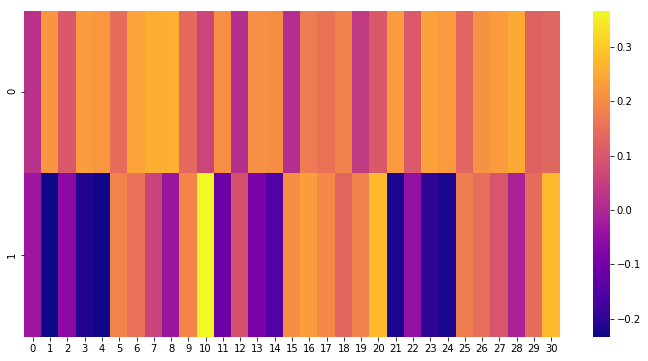

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

 